**Regularization Techniques in Machine Learning (L1, L2, ElasticNet)**

This notebook demonstrates how **L1 and L2 regularization** techniques help **prevent overfitting** in Machine Learning models.

We’ll explore:

- What overfitting is and why it's bad
- How **Ridge (L2)** shrinks coefficients (keeps all features)
- How **Lasso (L1)** removes unnecessary features (sets some coefficients to 0)
- Visual and numeric comparison of Linear, Ridge, and Lasso regression
- Model evaluation using **R²**, **Adjusted R²**, **RMSE**, and **Residual Plots**



**Outcome:**

By the end, you'll understand:

- How to choose between Ridge and Lasso
- When regularization improves your model
- Why simpler models often perform better on unseen data


> **Use L1 & L2 to make your models more robust, generalizable, and interpretable!**

**What is Machine Learning?** (**Recap**)

Machine Learning (ML) is a branch of Artificial Intelligence where computers learn from data to make predictions or decisions without being explicitly programmed.

Machine Learning is like teaching a computer how to learn from past examples — just like humans learn from experience. For example:

- If a kid sees that touching fire hurts, they learn not to do it again.

- ML algorithms do the same — they find patterns from data to predict or decide things.

**Types of Machine Learning:**

- Supervised Learning (Labeled data):
     - Like a teacher guiding. You give input + correct answer.
         - e.g., Regression (Predicting prices), Classification (classifying emails.)

- Unsupervised Learning (Unlabeled data):
    - No answers, the algorithm finds patterns on its own.
        - e.g., Clustering (Grouping similar customers.)

- Reinforcement Learning:
    - Learning by reward and punishment.
        - e.g., Games, robots learning to walk.

**Linear Regression - Predicting with Lines**

Regression is about predicting numbers. For example, predicting:

- Salary based on years of experience

 - Mileage (mpg) of a car based on features like horsepower, weight, etc.

- Simple Linear Regression:
  - Predicts using one feature → Equation:
$$
y = mx + b
$$

- Multiple Linear Regression (MLR):
  - Uses multiple features →
  $$
y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n
$$

**Underfitting vs Overfitting**

- Underfitting: Model is too simple → Poor on both train/test (misses patterns)

- Overfitting: Model is too complex → Great on training, bad on test  (memorizes data)

**Techniques to Handle Overfitting**

- Regularization
- Cross-validation
- Simpler models
- More data
- Dropout
- Pruning

**What is Regularization?**

Regularization helps prevent overfitting by penalizing large coefficients in the model.

**Types of Regularization**

| Type           | Penalty | Behavior                        |
|----------------|---------|---------------------------------|
| **Ridge**      | L2      | Shrinks coefficients (not zero) |
| **Lasso**      | L1      | Some coefficients become 0      |
| **ElasticNet** | L1 + L2 | Combines both                   |

**Analogy:**

- Lasso = Removing unhelpful friends  
- Ridge = Asking loud people to speak softer

**Steps in This Notebook:**

- Build baseline MLR model

- Apply Lasso, Ridge, and ElasticNet

- Compare performance

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Load and Explore the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\car-mpg.csv")
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


# Data Cleaning & Encoding

- Drop irrelevant columns (`car_name`)
- Convert and encode `origin`
- Replace `?` with `NaN`, fill with **median**

## Drop car_name as it's not a useful feature

In [3]:
# Drop car_name as it's not a useful feature
data = data.drop(['car_name'], axis=1)

## Convert 'origin' to categorical labels

In [4]:
# Convert 'origin' to categorical labels
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

## One-hot encode the 'origin' column

In [5]:
# One-hot encode the 'origin' column
data = pd.get_dummies(data, columns=['origin'],dtype=int)

## Replace '?' with NaN and then fill missing values with median

In [6]:
# Step 1: Replace '?' with NaN (if applicable)
data = data.replace('?', np.nan)

# Step 2: Convert all columns to numeric where possible
data = data.apply(pd.to_numeric, errors='coerce')

# Step 3: Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Step 4: Fill missing values in numeric columns with the median
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))


In [7]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


# Feature and Target Separation 

In [8]:
X = data.drop(['mpg'], axis=1) # Independent Variables
y = data[['mpg']] # Dependent Variable

# Scaling

Scale columns so none dominate (e.g., weight vs hp)

In [9]:
# Scale the data
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns=X.columns)

In [10]:
X_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [11]:
y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns=y.columns)

In [12]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


# Train test split

70% training, 30% testing for validation

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)

# Train a Simple Linear Regression Model

**Uses all features directly**

In [14]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Print coefficients and intercept
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

print("Intercept:", regression_model.intercept_[0])

The coefficient for cyl is 0.321022385691611
The coefficient for disp is 0.32483430918483897
The coefficient for hp is -0.22916950059437569
The coefficient for wt is -0.7112101905072298
The coefficient for acc is 0.014713682764191237
The coefficient for yr is 0.3755811949510748
The coefficient for car_type is 0.3814769484233099
The coefficient for origin_america is -0.07472247547584178
The coefficient for origin_asia is 0.044515252035677896
The coefficient for origin_europe is 0.04834854953945386
Intercept: 0.019284116103639764


# Ridge Regression (L2 Regularization)

**Shrinks coefficients to control overfitting**

In [15]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train, y_train)

print("Ridge model coefficients:", ridge_model.coef_)

Ridge model coefficients: [ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
  0.37725608 -0.07423624  0.04441039  0.04784031]


# Lasso Regression (L1 Regularization)

**Drops unnecessary features by zeroing out coefficients**

In [16]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

print("Lasso model coefficients:", lasso_model.coef_)

Lasso model coefficients: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


# Tips 

* Use R² when starting

* Use Adjusted R² when comparing models with different number of features

* Use RMSE (or MAE) to see real prediction error

* Use visuals (like scatter plots & residual plots) to validate behavior

# R² Score Comparison

**R² (Coefficient of Determination)** tells us how much variation in the target (e.g. `mpg`) is explained by the model.

- $R^2 = 1$: Perfect prediction  
- $R^2 = 0$: Model explains nothing  
- $R^2 < 0$: Worse than just predicting the mean  
- **Ideal range**: Closer to **1** is better

In [17]:
print("Linear Train R²:", regression_model.score(X_train, y_train))
print("Linear Test R²:", regression_model.score(X_test, y_test))

print("Ridge Train R²:", ridge_model.score(X_train, y_train))
print("Ridge Test R²:", ridge_model.score(X_test, y_test))

print("Lasso Train R²:", lasso_model.score(X_train, y_train))
print("Lasso Test R²:", lasso_model.score(X_test, y_test))

Linear Train R²: 0.8343770256960538
Linear Test R²: 0.8513421387780066
Ridge Train R²: 0.8343617931312616
Ridge Test R²: 0.8518882171608506
Lasso Train R²: 0.7938010766228453
Lasso Test R²: 0.8375229615977083


## Interpretation:

- All models do well (R² > 0.79).

- Ridge gives the best generalization.

- Lasso is slightly less accurate, but it simplifies the model by eliminating less useful features.

# Adjusted R² Using statsmodels (Like in R)

Adjusted R² improves over plain R² by considering how many predictors you're using. It penalizes unnecessary features.

- $\text{Adjusted } R^2 = 1$ → Perfect prediction (just like R²)  
- $\text{Adjusted } R^2 < R^2$ → Penalizes too many features  
- $\text{Adjusted } R^2 < 0$ → Model likely overfits or uses irrelevant features  
- Best for comparing models with **different numbers of predictors**  
- **Closer to 1 is better** — just like R², but more honest!

In [18]:
import statsmodels.formula.api as smf

# Merge features and target
data_train_test = pd.concat([X_train, y_train], axis=1)

# Fit OLS regression model
ols1 = smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data=data_train_test).fit()

# View summary
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           3.12e-99
Time:                        13:30:17   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

## Adjusted R² from statsmodels:

```python 
R-squared:      0.834
Adj. R-squared: 0.829
```

- Close values → most features are useful

- If Adjusted R² was much lower than R², it would mean too many unhelpful features

# Root Mean Squared Error (RMSE)

RMSE shows the average prediction error in the same units as the target variable.

- $\text{RMSE} \geq 0$ → Cannot be negative  
- $\text{RMSE} = 0$ → Perfect prediction (no error)  
- The **lower**, the better  
- Same unit as the predicted variable (e.g., mpg, price, etc.)


> Example: RMSE = 2.5 → on average, your predictions are off by 2.5 units


In [19]:
mse = np.mean((regression_model.predict(X_test) - y_test) ** 2)
import math
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.37766934254087847


Very low RMSE! Your model is off by just ±0.38 on average when predicting mpg.

# Residual Plot – Check for Patterns

**Why plot it?**

- To check if the model is missing any patterns

- A good residual plot has no shape — it looks random

**Our plots look random → model fits well**



<Axes: xlabel='acc', ylabel='mpg'>

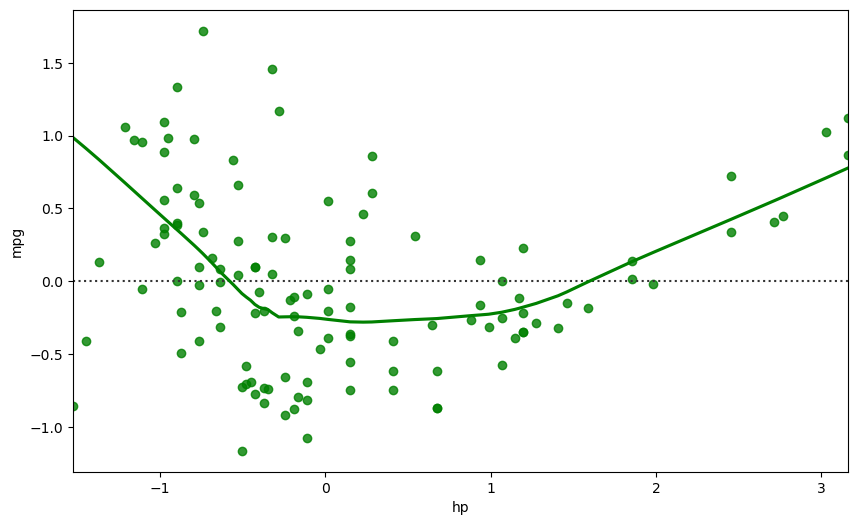

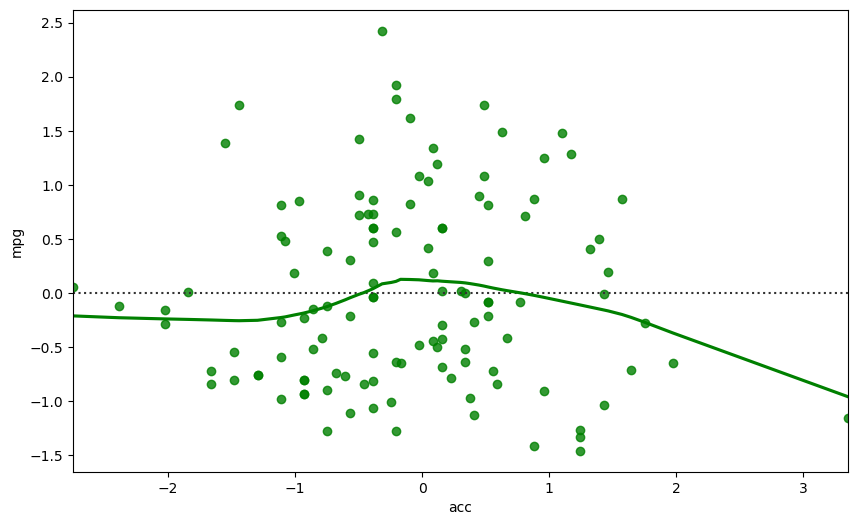

In [20]:
fig = plt.figure(figsize=(10, 6))
sns.residplot(x=X_test['hp'], y=y_test['mpg'], color='green', lowess=True)

fig = plt.figure(figsize=(10, 6))
sns.residplot(x=X_test['acc'], y=y_test['mpg'], color='green', lowess=True)

# Prediction vs Actual – Visualization

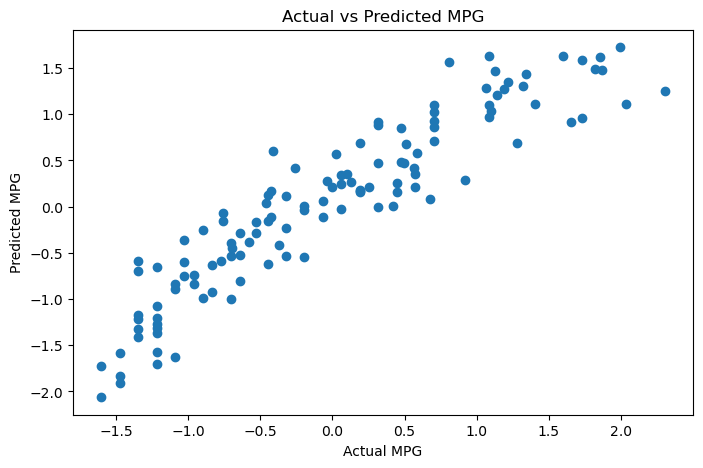

In [21]:
y_pred = regression_model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test['mpg'], y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()

**This plot compares:**

Actual mpg values vs predicted mpg

* A good model will show points clustered around the diagonal line

* Your plot shows this — predictions are close to real-world values

# Final Summary

-  **Linear Regression** is simple and accurate, but it may **overfit** when the model becomes too complex or when irrelevant features are included.

-  **Ridge Regression (L2)** is the **best performer** in this case — it shrinks coefficients slightly to prevent overfitting while maintaining good accuracy and generalization.

-  **Lasso Regression (L1)** is slightly less accurate but more **interpretable** — it can automatically **remove weak or unnecessary features** by setting their coefficients to zero.

-  **Adjusted R²** helps evaluate model quality more fairly when you have many features — it penalizes complexity.

-  **RMSE (Root Mean Squared Error)** tells how far your predictions are from actual values — lower RMSE is better.

-  **Residual and Scatter Plots** help visualize errors and check how well your model fits unseen data.



## Recommendation:

>  Use a combination of **R²**, **Adjusted R²**, **RMSE**, and **visual plots** to compare and select the most reliable model — not just raw accuracy.

**In this case:**

 **Ridge Regression** strikes the best balance between **accuracy, simplicity, and generalization.**
